# **Import and manipulation of the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/Magistrale/Projects/DCML/'

Mounted at /content/gdrive


## **Loading of the dataset**

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
dataset = pd.read_csv(root_path + 'DCML_Project_dataset.csv', na_filter=False) # I have to set na_filter to false since I have a valid label "None" in the "injector" column which is otherwise set to NaN. It does not hurt anything since the dataset has no empty cells

In [3]:
dp_num, features_num = dataset.shape
print(f"Number of datapoints: {dp_num}")
print(f"Number of features: {features_num}")

Number of datapoints: 12000
Number of features: 116


In [4]:
dataset.head()

,time,datetime,core_0_%user,core_0_%nice,core_0_%system,core_0_%idle,core_0_%iowait,core_0_%irq,core_0_%softirq,core_0_%steal,...,virtual_mem_percent,virtual_mem_used,virtual_mem_free,virtual_mem_active,virtual_mem_inactive,virtual_mem_buffers,virtual_mem_cached,virtual_mem_shared,virtual_mem_slab,injector
0,1737216095942,2025-01-18 17:01:35,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,29.2,3128741888,10094477312,2021990400,2807001088,52965376,3247644672,1274171392,560279552,None
1,1737216096650,2025-01-18 17:01:36,2.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,28.8,3133173760,10173571072,2020073472,2807005184,52965376,3164119040,1190641664,560283648,None
2,1737216097362,2025-01-18 17:01:37,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,29.8,3121614848,9999351808,2019950592,2807005184,52977664,3349884928,1376407552,560291840,None
3,1737216098079,2025-01-18 17:01:38,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,31.5,3133083648,9718800384,2016591872,2807017472,52977664,3618967552,1645490176,560283648,None
4,1737216098790,2025-01-18 17:01:38,1.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,...,31.0,3127058432,9803493376,2017411072,2807025664,52977664,3540299776,1566814208,560283648,None


## **A bit of feature engineering to identify features that can be removed from the dataset as they are not useful in detecting anomalies**

Now, we will examine the dataset to check which features to remove from the dataset. In fact, since machine learning algorithms learn from data, these last should be as much as possible noise-free and also relevant in predicting the value for the target feature. Since the dataset contains many features of the system monitored both under injection and not, some of them might be irrelevant showing fairly constant values obtained from monitoring.

In [5]:
# first of all I drop the columns time and datetime to avoid the algorithm to learn from date and time
dataset = dataset.drop(columns=['time', 'datetime'])

In [6]:
features_to_remove_first_config = [] # list of irrelevant features that should be removed in the first config
feature_to_remove_second_config = [] # list of irrelevant features that should be removed in the second config
for core in range(8): # i have 8 logical core
  start = core * 10
  end = start + 10
  x = list(dataset.columns)[start:end] # list of cpu times for each core one per time
  print(f"Description for features {start} to {end - 1}:")
  display(dataset[x].describe())

Description for features 0 to 9:


,core_0_%user,core_0_%nice,core_0_%system,core_0_%idle,core_0_%iowait,core_0_%irq,core_0_%softirq,core_0_%steal,core_0_%guest,core_0_%guest_nice
count,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.879833,0.00025,0.351833,7.603833,0.050833,0.0,0.074833,0.0,0.0,0.0
std,2.448447,0.01581,0.576548,2.476704,0.231489,0.0,0.264082,0.0,0.0,0.0
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,1.000000,0.00000,0.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.00000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.00000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,1.00000,10.000000,10.000000,3.000000,0.0,2.000000,0.0,0.0,0.0


Description for features 10 to 19:


,core_1_%user,core_1_%nice,core_1_%system,core_1_%idle,core_1_%iowait,core_1_%irq,core_1_%softirq,core_1_%steal,core_1_%guest,core_1_%guest_nice
count,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.404833,0.00025,0.327833,8.021083,0.046167,0.0,0.085333,0.0,0.0,0.0
std,1.981145,0.01581,0.519822,2.033712,0.217269,0.0,0.280282,0.0,0.0,0.0
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,0.00000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.00000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.00000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,1.00000,8.000000,10.000000,2.000000,0.0,2.000000,0.0,0.0,0.0


Description for features 20 to 29:


,core_2_%user,core_2_%nice,core_2_%system,core_2_%idle,core_2_%iowait,core_2_%irq,core_2_%softirq,core_2_%steal,core_2_%guest,core_2_%guest_nice
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.647000,0.000917,0.330750,7.829583,0.077000,0.0,0.021583,0.0,0.0,0.0
std,2.232444,0.091742,0.563514,2.281697,0.277928,0.0,0.145897,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.000000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,10.000000,11.000000,11.000000,3.000000,0.0,2.000000,0.0,0.0,0.0


Description for features 30 to 39:


,core_3_%user,core_3_%nice,core_3_%system,core_3_%idle,core_3_%iowait,core_3_%irq,core_3_%softirq,core_3_%steal,core_3_%guest,core_3_%guest_nice
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.769083,0.001000,0.324750,7.752667,0.071333,0.0,0.010667,0.0,0.0,0.0
std,2.417005,0.093093,0.565521,2.440455,0.268174,0.0,0.102732,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.000000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,10.000000,10.000000,11.000000,2.000000,0.0,1.000000,0.0,0.0,0.0


Description for features 40 to 49:


,core_4_%user,core_4_%nice,core_4_%system,core_4_%idle,core_4_%iowait,core_4_%irq,core_4_%softirq,core_4_%steal,core_4_%guest,core_4_%guest_nice
count,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.481667,0.0,0.335083,8.020750,0.069333,0.0,0.006667,0.0,0.0,0.0
std,1.964642,0.0,0.546041,2.050285,0.267766,0.0,0.081380,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.0,0.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.0,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,0.0,9.000000,11.000000,3.000000,0.0,1.000000,0.0,0.0,0.0


Description for features 50 to 59:


,core_5_%user,core_5_%nice,core_5_%system,core_5_%idle,core_5_%iowait,core_5_%irq,core_5_%softirq,core_5_%steal,core_5_%guest,core_5_%guest_nice
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.841833,0.000167,0.336167,7.613667,0.046167,0.0,0.066333,0.0,0.0,0.0
std,2.379661,0.018257,0.539922,2.431784,0.221072,0.0,0.250210,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.000000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,2.000000,9.000000,11.000000,3.000000,0.0,2.000000,0.0,0.0,0.0


Description for features 60 to 69:


,core_6_%user,core_6_%nice,core_6_%system,core_6_%idle,core_6_%iowait,core_6_%irq,core_6_%softirq,core_6_%steal,core_6_%guest,core_6_%guest_nice
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.703333,0.002750,0.327000,7.810250,0.058750,0.0,0.003583,0.0,0.0,0.0
std,2.261728,0.145181,0.568564,2.321392,0.248268,0.0,0.059756,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.000000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,10.000000,9.000000,11.000000,3.000000,0.0,1.000000,0.0,0.0,0.0


Description for features 70 to 79:


,core_7_%user,core_7_%nice,core_7_%system,core_7_%idle,core_7_%iowait,core_7_%irq,core_7_%softirq,core_7_%steal,core_7_%guest,core_7_%guest_nice
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.0,12000.0,12000.0
mean,1.941417,0.000500,0.341833,7.582833,0.055333,0.0,0.002667,0.0,0.0,0.0
std,2.541854,0.046547,0.615100,2.584124,0.242439,0.0,0.051573,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,1.000000,0.000000,0.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,1.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,2.000000,0.000000,1.000000,9.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
max,11.000000,5.000000,10.000000,11.000000,3.000000,0.0,1.000000,0.0,0.0,0.0


The first config is a config in which only features with standard deviation equal to zero are dropped from the dataset. In the second config are dropped all features with a low standard deviation also if greater than zero to see if these features are useful or useless to train the algorithms.

In [7]:
features_to_remove_first_config.append(['core_0_%irq', 'core_0_%steal', 'core_0_%guest', 'core_0_%guest_nice',\
                                        'core_1_%irq', 'core_1_%steal', 'core_1_%guest', 'core_1_%guest_nice',\
                                        'core_2_%irq', 'core_2_%steal', 'core_2_%guest', 'core_2_%guest_nice',\
                                        'core_3_%irq', 'core_3_%steal', 'core_3_%guest', 'core_3_%guest_nice',\
                                        'core_4_%nice', 'core_4_%irq', 'core_4_%steal', 'core_4_%guest', 'core_4_%guest_nice',\
                                        'core_5_%irq', 'core_5_%steal', 'core_5_%guest', 'core_5_%guest_nice',\
                                        'core_6_%irq', 'core_6_%steal', 'core_6_%guest', 'core_6_%guest_nice',\
                                        'core_7_%irq', 'core_7_%steal', 'core_7_%guest', 'core_7_%guest_nice'])
features_to_remove_second_config = features_to_remove_first_config.copy()
features_to_remove_second_config.append(['core_0_%nice', 'core_0_%iowait', 'core_0_%softirq',\
                                         'core_1_%nice', 'core_1_%iowait', 'core_1_%softirq',\
                                         'core_2_%nice', 'core_2_%iowait', 'core_2_%softirq',\
                                         'core_3_%nice', 'core_3_%iowait', 'core_3_%softirq',\
                                         'core_4_%iowait', 'core_4_%softirq',\
                                         'core_5_%nice', 'core_5_%iowait', 'core_5_%softirq',\
                                         'core_6_%nice', 'core_6_%iowait', 'core_6_%softirq',\
                                         'core_7_%nice', 'core_7_%iowait', 'core_7_%softirq'])

As shown in the panel below, all frequences and usage percentages for each core and the entire CPU should be useful for training since, as expected, they have high standard deviations.

In [8]:
x = list(dataset.columns)[80:98]
display(dataset[x].describe())

,freq_cpu_global_usage,%cpu_global_usage,%logical_core_0_usage,freq_logical_core_0_usage,%logical_core_1_usage,freq_logical_core_1_usage,%logical_core_2_usage,freq_logical_core_2_usage,%logical_core_3_usage,freq_logical_core_3_usage,%logical_core_4_usage,freq_logical_core_4_usage,%logical_core_5_usage,freq_logical_core_5_usage,%logical_core_6_usage,freq_logical_core_6_usage,%logical_core_7_usage,freq_logical_core_7_usage
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1957.565395,20.841285,23.054417,1893.534284,18.368992,1940.186440,20.072158,1950.969862,20.921283,1982.661651,18.196642,1896.316625,22.669250,1997.473872,20.745983,1951.883553,22.701558,1993.709522
std,1000.033644,14.076801,22.312906,1341.355828,18.094737,1313.649641,20.433421,1343.559266,21.697714,1362.430780,17.897820,1345.100795,22.044786,1362.977349,20.988269,1359.882112,23.169462,1393.195828
min,399.966750,0.000000,0.000000,387.230000,0.000000,387.065000,0.000000,385.904000,0.000000,389.372000,0.000000,387.015000,0.000000,388.501000,0.000000,387.565000,0.000000,377.868000
25%,1078.370844,13.625000,10.200000,737.424750,8.200000,860.859500,8.200000,801.400750,8.200000,808.571250,8.200000,698.733000,10.000000,808.818250,8.200000,732.267500,8.300000,738.766250
50%,1764.248000,18.475000,16.300000,1287.603500,14.300000,1386.771000,14.300000,1338.846000,14.300000,1356.848000,14.300000,1294.261500,16.300000,1399.946000,14.600000,1350.421000,16.000000,1370.518500
75%,2740.315750,23.062500,24.000000,3244.413750,20.400000,3245.013750,22.000000,3300.937750,22.400000,3400.000000,20.400000,3261.650750,24.500000,3463.451250,22.400000,3324.679500,24.000000,3492.665250
max,4103.240625,100.000000,100.000000,4700.047000,100.000000,4652.698000,100.000000,4723.618000,100.000000,4729.375000,100.000000,4722.274000,100.000000,4700.000000,100.000000,4700.047000,100.000000,4700.000000


Even the feature values representing the temperatures measured for each physical core have quite high standard deviations and then should be useful for training.

In [9]:
x = list(dataset.columns)[98:102]
display(dataset[x].describe())

,physical_core_0_temp,physical_core_1_temp,physical_core_2_temp,physical_core_3_temp
count,12000.000000,12000.000000,12000.000000,12000.000000
mean,59.157083,61.874167,57.312417,59.947667
std,14.577389,14.022894,13.580428,15.178712
min,34.000000,37.000000,34.000000,35.000000
25%,49.000000,52.000000,47.000000,48.000000
50%,55.000000,58.000000,54.000000,56.000000
75%,67.000000,70.000000,64.000000,69.000000
max,100.000000,100.000000,99.000000,100.000000


In [10]:
x = list(dataset.columns)[102:]
display(dataset[x].describe())

,virtual_mem_total,virtual_mem_available,virtual_mem_percent,virtual_mem_used,virtual_mem_free,virtual_mem_active,virtual_mem_inactive,virtual_mem_buffers,virtual_mem_cached,virtual_mem_shared,virtual_mem_slab
count,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04
mean,1.652383e+10,1.224158e+10,25.915608,2.688158e+09,1.019536e+10,2.464033e+09,2.013101e+09,4.466610e+07,3.595643e+09,1.219967e+09,5.384080e+08
std,0.000000e+00,1.835994e+09,11.110933,1.768664e+09,1.950665e+09,1.713998e+09,5.514042e+08,1.495815e+07,6.961643e+08,2.500771e+08,1.466476e+07
min,1.652383e+10,1.333629e+09,11.800000,1.174872e+09,1.766687e+08,7.046717e+08,1.075802e+09,5.918720e+06,2.150035e+09,3.833979e+08,5.168538e+08
25%,1.652383e+10,1.189946e+10,20.500000,1.903330e+09,9.527419e+09,1.723955e+09,1.583624e+09,3.155968e+07,3.104505e+09,1.052861e+09,5.291090e+08
50%,1.652383e+10,1.251672e+10,24.300000,2.368485e+09,1.055666e+10,2.159718e+09,1.973559e+09,4.651418e+07,3.576349e+09,1.228022e+09,5.355971e+08
75%,1.652383e+10,1.313976e+10,28.000000,2.891862e+09,1.122290e+10,2.637622e+09,2.211498e+09,5.424742e+07,3.950195e+09,1.385794e+09,5.525463e+08
max,1.652383e+10,1.456894e+10,91.900000,1.387670e+10,1.303434e+10,1.373628e+10,3.162960e+09,7.721370e+07,7.174668e+09,3.193799e+09,5.648671e+08


The panel above shows that all features for the VM are useful but the feture 'virtual_mem_total' that is constant since the total amount of virtual memory in the system is a fixed quantity. Then, it will be dropped from the dataset in both configs.

In [11]:
features_to_remove_first_config.append(['virtual_mem_total'])
features_to_remove_second_config.append(['virtual_mem_total'])

Now we can obtain both new datasets to be used to train our algorithms.

In [12]:
features_to_remove_first_config = [item for sublist in features_to_remove_first_config for item in sublist] # to aggregate all items into into a single larger list
features_to_remove_second_config = [item for sublist in features_to_remove_second_config for item in sublist] # to aggregate all items into into a single larger list

dataset_first_config = dataset.drop(columns=features_to_remove_first_config)
dataset_second_config = dataset.drop(columns=features_to_remove_second_config)

dp_num_fc, features_num_fc = dataset_first_config.shape
print(f"Number of datapoints first config: {dp_num_fc}")
print(f"Number of features first config: {features_num_fc}")

dp_num_sc, features_num_sc = dataset_second_config.shape
print(f"Number of datapoints: {dp_num_sc}")
print(f"Number of features: {features_num_sc}")

Number of datapoints first config: 12000
Number of features first config: 80
Number of datapoints: 12000
Number of features: 57


## **Preparing training and test sets**

First, we remove the correct labels from the training and test sets and save these labels in a separate vector. While saving the labels, we replace all the labels related to attacks with a 1 and all the labels related to the normal phase, where no injections were performed, with a 0.

In [13]:
X_first_config = dataset_first_config.drop(columns=['injector'])
X_second_config = dataset_second_config.drop(columns=['injector'])
y = dataset['injector'].apply(lambda x: 0 if x == "None" else 1)

Since features have very different ranges of values between them, we can apply the feature scaling to reduce these differences. We can use the min-max technique or the standard scaler. I prefer to use the standard scaler since the min-max restricts values between a specific range and then it is more sensitive to outliers. The standarsScaler is fitted only on the training set and the transformation is done one both training and test sets. This is done to avoid that the algorithm is influenced during training by the test set, distorting the model testing phase resulting in a model with higher performance metrics, but not realistic.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# First Config
X_train_first_config, X_test_first_config, y_train_first_config, y_test_first_config = train_test_split(X_first_config, y, test_size=0.3, random_state=42)
std_scaler_first_config = StandardScaler()
X_train_first_config_std = std_scaler_first_config.fit_transform(X_train_first_config)
X_test_first_config_std = std_scaler_first_config.transform(X_test_first_config)


# Second Config
X_train_second_config, X_test_second_config, y_train_second_config, y_test_second_config = train_test_split(X_second_config, y, test_size=0.3, random_state=42)
std_scaler_second_config = StandardScaler()
X_train_second_config_std = std_scaler_second_config.fit_transform(X_train_second_config)
X_test_second_config_std = std_scaler_second_config.transform(X_test_second_config)

Since I will use also a Recurrent Neural Network, I use a different mechanism to shuffle data and to split the dataset between trainining, validation and test set.  
I monitored the system by alternating the normal state to the abnormal state (where an injection has been performed).
Then, the dataset is organized as a chain of sequences where a sequence consists of data monitored while the system is in normal state followed by data monitored with the system under one specific attack.  
For RNNs, time sequences are of primary importance and then the order of datapoints inside the same sequence has to be kept unchanged.  
Then, I split the dataset into a list of sequences; subsequently I shuffle the list of sequences, and finally I will do the split between trainining, validation and test sequences. After that I will apply the standard scaler on data.

In [15]:
# Here there are some support functions that will be used to prepare the training and test sets for the RNN as explained before.

import random

def extract_sequences(input_dataset) -> list:
  """
  This function, given a dataset organized into sequences, where a sequence consists of data monitored while the system is in normal state (label 'injector' = 0) followed by data monitored with the system under attack (label 'injector' = 1),
  returns a list of sequences.
  :param input_dataset: dataset organized into sequences
  :return: list of sequences
  """
  sequences = []
  current_sequence = []
  column_names = input_dataset.columns.tolist()

  for i, row in input_dataset.iterrows():
      current_sequence.append(row)
      if row['injector'] == 1 and (i + 1 == len(input_dataset) or input_dataset.iloc[i + 1]['injector'] == 0): # whether we are at the end of the dataset or a sequence we append this sequence in the list of sequences
          sequences.append(pd.DataFrame(current_sequence, columns=column_names))  # Save the sequence
          current_sequence = []

  # Add the last sequence if not empty
  if current_sequence:
      sequences.append(pd.DataFrame(current_sequence, columns=column_names))

  return sequences

def split_train_val_test_scale(input_dataset, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2, shuffle=True, seed=None):
    """
    This function, given an input dataset, performs a split of the dataset into training, validation, and test sets,
    based on the concept of sequences. The returned sets are also scaled.
    This function has to be used when you have a dataset organized into sequences and you want to keep unchanged
    the order of datapoints inside the same sequence.
    It is useful when training, validating and testing a Recurrent Neural Network, in which time series are involved.

    :param input_dataset: dataset to split
    :param train_ratio: ratio of the train set (default 0.6)
    :param val_ratio: ratio of the validation set (default 0.2)
    :param test_ratio: ratio of the test set (default 0.2)
    :param shuffle: True if the sequences have to be shuffled between them
    :param seed: random seed to allow reproducibility
    :return: X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, scaler
    """
    assert train_ratio + val_ratio + test_ratio == 1.0, "The sum of train_ratio, val_ratio, and test_ratio must be 1.0"

    dataset_rnn = input_dataset.copy()
    dataset_rnn['injector'] = dataset_rnn['injector'].apply(lambda x: 0 if x == "None" else 1)

    sequences = extract_sequences(dataset_rnn) # uses the function defined above to obtain a list of sequences

    if seed is not None:
        random.seed(seed)

    if shuffle:
        random.shuffle(sequences)

    num_sequences = len(sequences)
    num_train_sequences = int(num_sequences * train_ratio)
    num_val_sequences = int(num_sequences * val_ratio)

    train_sequences = sequences[:num_train_sequences]
    val_sequences = sequences[num_train_sequences:num_train_sequences + num_val_sequences]
    test_sequences = sequences[num_train_sequences + num_val_sequences:]

    train_set_to_scale = pd.concat(train_sequences, ignore_index=True)
    val_set_to_scale = pd.concat(val_sequences, ignore_index=True)
    test_set_to_scale = pd.concat(test_sequences, ignore_index=True)

    y_train = train_set_to_scale['injector']
    y_val = val_set_to_scale['injector']
    y_test = test_set_to_scale['injector']

    train_set_to_scale = train_set_to_scale.drop(columns=['injector'])
    val_set_to_scale = val_set_to_scale.drop(columns=['injector'])
    test_set_to_scale = test_set_to_scale.drop(columns=['injector'])

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(train_set_to_scale)  # fit on the train set and transform
    X_val_std = scaler.transform(val_set_to_scale)         # transform using the same scaler
    X_test_std = scaler.transform(test_set_to_scale)       # transform using the same scaler

    return X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, scaler

Now i use the two functions defined in the above module to do the split of the dataset into training, validation and test sets for both configurations.

In [16]:
# Scaling for the First Config
X_train_first_config_rnn_std, X_val_first_config_rnn_std, X_test_first_config_rnn_std, y_train_first_config_rnn, y_val_first_config_rnn, y_test_first_config_rnn, scaler_first_config_rnn = split_train_val_test_scale(input_dataset=dataset_first_config, seed=42, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2)

# Scaling for the Second Config
X_train_second_config_rnn_std, X_val_second_config_rnn_std, X_test_second_config_rnn_std, y_train_second_config_rnn, y_val_second_config_rnn, y_test_second_config_rnn, scaler_second_config_rnn = split_train_val_test_scale(input_dataset=dataset_second_config, seed=42, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2)

# **Training**

Since the goal of this project is to develop an anomaly detector that only detects known errors/attacks, I will only use supervised machine learning algorithms, as in general they are better than unsupervised ones in detecting these errors/attacks.
In particular I will train:  
1) Random Forest: a bagging algorithm based on a forest of Decision Trees;  
2) eXtreme Gradient Boosting: a boosting algorithm whose base-learners are Decision Trees;  
3) Stacking of -> Random Forest + eXtreme Gradient Boosting + ADABoost;  
4) Voting of -> Random Forest + eXtreme Gradient Boosting + ADABoost;  
5) Recurrent Neural Network -> Gated Recurrent Unit (GRU)

In [17]:
!pip install scikit-learn==1.3.0 # to use gridSearchCV in xgboost
import sklearn
print(sklearn.__version__)

1.3.0


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## **1. Random Forest**

In [19]:
rf_param_grid = {
    'n_estimators': [10, 50, 150],
    'max_depth': [10, 20, None],
}

### **First Config** (fc)

Bulding the model for the First Config

In [20]:
rf_fc_clf = RandomForestClassifier(random_state=42)

rf_fc_grid_search = GridSearchCV(
    estimator=rf_fc_clf,
    param_grid=rf_param_grid,
    cv=10,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
rf_fc_grid_search.fit(X_train_first_config_std, y_train_first_config)
print("Best RF First Config Parameters:", rf_fc_grid_search.best_params_) # these parameters will be used for stacking and bagging configurations
best_rf_fc_clf = rf_fc_grid_search.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best RF First Config Parameters: {'max_depth': None, 'n_estimators': 150}


Testing the model for the First Config

In [21]:
y_pred_rf_fc = best_rf_fc_clf.predict(X_test_first_config_std)
accuracy = accuracy_score(y_test_first_config, y_pred_rf_fc)
mcc = matthews_corrcoef(y_test_first_config, y_pred_rf_fc)
f1 = f1_score(y_test_first_config, y_pred_rf_fc)
tn, fp, fn, tp = confusion_matrix(y_test_first_config, y_pred_rf_fc).ravel()
recall = recall_score(y_test_first_config, y_pred_rf_fc)
precision = precision_score(y_test_first_config, y_pred_rf_fc)
rf_fc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(rf_fc_results_summary)

Model Performance Metrics:
- Accuracy: 0.9611
- MCC: 0.9208
- F1 Score: 0.9509
- Recall: 0.9905
- Precision: 0.9144

Confusion Matrix Values:
- True Negatives (TN): 2104
- False Positives (FP): 127
- False Negatives (FN): 13
- True Positives (TP): 1356


### **Second Config** (sc)

Bulding the model for the Second Config

In [22]:
rf_sc_clf = RandomForestClassifier(random_state=42)

rf_sc_grid_search = GridSearchCV(
    estimator=rf_sc_clf,
    param_grid=rf_param_grid,
    cv=10,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
rf_sc_grid_search.fit(X_train_second_config_std, y_train_second_config)
print("Best RF Second Config Parameters:", rf_sc_grid_search.best_params_) # these parameters will be used for stacking and bagging configurations
best_rf_sc_clf = rf_sc_grid_search.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best RF Second Config Parameters: {'max_depth': None, 'n_estimators': 150}


Testing the model for the Second Config

In [23]:
y_pred_rf_sc = best_rf_sc_clf.predict(X_test_second_config_std)
accuracy = accuracy_score(y_test_second_config, y_pred_rf_sc)
mcc = matthews_corrcoef(y_test_second_config, y_pred_rf_sc)
f1 = f1_score(y_test_second_config, y_pred_rf_sc)
tn, fp, fn, tp = confusion_matrix(y_test_second_config, y_pred_rf_sc).ravel()
recall = recall_score(y_test_second_config, y_pred_rf_sc)
precision = precision_score(y_test_second_config, y_pred_rf_sc)
rf_sc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(rf_sc_results_summary)

Model Performance Metrics:
- Accuracy: 0.9644
- MCC: 0.9277
- F1 Score: 0.9551
- Recall: 0.9942
- Precision: 0.9190

Confusion Matrix Values:
- True Negatives (TN): 2111
- False Positives (FP): 120
- False Negatives (FN): 8
- True Positives (TP): 1361


## **2. eXtreme Gradient Boosting (XGBoost)**

In [24]:
xgb_param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [10, 40, 70],
    'learning_rate': [0.2],
}

### **First Config**

Building the model for the First Config

In [25]:
xgb_fc_clf = XGBClassifier(eval_metric='logloss')

xgb_fc_grid_search = GridSearchCV(
    estimator=xgb_fc_clf,
    param_grid=xgb_param_grid,
    cv=10,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

xgb_fc_grid_search.fit(X_train_first_config_std, y_train_first_config)
print("Best XGBoost First Config Parameters:", xgb_fc_grid_search.best_params_) # these parameters will be used for stacking and bagging configurations
best_xgb_fc_clf = xgb_fc_grid_search.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best XGBoost First Config Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300}


Testing the model for the First Config

In [26]:
y_pred_xgb_fc = best_xgb_fc_clf.predict(X_test_first_config_std)

accuracy = accuracy_score(y_test_first_config, y_pred_xgb_fc)
mcc = matthews_corrcoef(y_test_first_config, y_pred_xgb_fc)
f1 = f1_score(y_test_first_config, y_pred_xgb_fc)
tn, fp, fn, tp = confusion_matrix(y_test_first_config, y_pred_xgb_fc).ravel()
recall = recall_score(y_test_first_config, y_pred_xgb_fc)
precision = precision_score(y_test_first_config, y_pred_xgb_fc)

xgb_fc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(xgb_fc_results_summary)


Model Performance Metrics:
- Accuracy: 0.9806
- MCC: 0.9594
- F1 Score: 0.9749
- Recall: 0.9912
- Precision: 0.9590

Confusion Matrix Values:
- True Negatives (TN): 2173
- False Positives (FP): 58
- False Negatives (FN): 12
- True Positives (TP): 1357


### **Second Config**

Building the model for the Second Config

In [27]:
xgb_sc_clf = XGBClassifier(eval_metric='logloss')

xgb_sc_grid_search = GridSearchCV(
    estimator=xgb_sc_clf,
    param_grid=xgb_param_grid,
    cv=10,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

xgb_sc_grid_search.fit(X_train_second_config_std, y_train_second_config)
print("Best XGBoost Second Config Parameters:", xgb_sc_grid_search.best_params_) # these parameters will be used for stacking and bagging configurations
best_xgb_sc_clf = xgb_sc_grid_search.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best XGBoost Second Config Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300}


Testing the model for the Second Config

In [28]:
y_pred_xgb_sc = best_xgb_sc_clf.predict(X_test_second_config_std)

accuracy = accuracy_score(y_test_second_config, y_pred_xgb_sc)
mcc = matthews_corrcoef(y_test_second_config, y_pred_xgb_sc)
f1 = f1_score(y_test_second_config, y_pred_xgb_sc)
tn, fp, fn, tp = confusion_matrix(y_test_second_config, y_pred_xgb_sc).ravel()
recall = recall_score(y_test_second_config, y_pred_xgb_sc)
precision = precision_score(y_test_second_config, y_pred_xgb_sc)

xgb_sc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(xgb_sc_results_summary)


Model Performance Metrics:
- Accuracy: 0.9836
- MCC: 0.9657
- F1 Score: 0.9788
- Recall: 0.9927
- Precision: 0.9652

Confusion Matrix Values:
- True Negatives (TN): 2182
- False Positives (FP): 49
- False Negatives (FN): 10
- True Positives (TP): 1359


## **3. Stacking**

### **First Config**

Building the model for the First Config

In [29]:
stack_fc_clf = StackingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)),
                                              ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=10, random_state=42)),
                                              ('adab',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                                         n_estimators=50,learning_rate=0.2,random_state=42))],
                                  final_estimator=SVC(probability=True, random_state=42))
stack_fc_clf.fit(X_train_first_config_std, y_train_first_config)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(n_estimators=150,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              g...
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('adab',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                   learning_rate=0.2,
                                                   random_state=42))],
                   final_estimator=SVC(probability=True, random_state=42))

Testing the model for the First Config

In [30]:
y_pred_fc_stack = stack_fc_clf.predict(X_test_first_config_std)

accuracy = accuracy_score(y_test_first_config, y_pred_fc_stack)
mcc = matthews_corrcoef(y_test_first_config, y_pred_fc_stack)
f1 = f1_score(y_test_first_config, y_pred_fc_stack)
tn, fp, fn, tp = confusion_matrix(y_test_first_config, y_pred_fc_stack).ravel()
recall = recall_score(y_test_first_config, y_pred_fc_stack)
precision = precision_score(y_test_first_config, y_pred_fc_stack)

stack_fc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(stack_fc_results_summary)

Model Performance Metrics:
- Accuracy: 0.9833
- MCC: 0.9650
- F1 Score: 0.9784
- Recall: 0.9912
- Precision: 0.9658

Confusion Matrix Values:
- True Negatives (TN): 2183
- False Positives (FP): 48
- False Negatives (FN): 12
- True Positives (TP): 1357


### **Second Config**

Building the model for the Second Config

In [31]:
stack_sc_clf = StackingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)),
                                              ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=10, random_state=42)),
                                              ('adab',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                                         n_estimators=50,learning_rate=0.2,random_state=42))],
                                  final_estimator=SVC(probability=True, random_state=42))
stack_sc_clf.fit(X_train_second_config_std, y_train_second_config)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(n_estimators=150,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              g...
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('adab',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                   learning_rate=0.2,
                                                   random_state=42))],
                   final_estimator=SVC(probability=True, random_state=42))

Testing the model for Second Config

In [32]:
y_pred_sc_stack = stack_sc_clf.predict(X_test_second_config_std)

accuracy = accuracy_score(y_test_second_config, y_pred_sc_stack)
mcc = matthews_corrcoef(y_test_second_config, y_pred_sc_stack)
f1 = f1_score(y_test_second_config, y_pred_sc_stack)
tn, fp, fn, tp = confusion_matrix(y_test_second_config, y_pred_sc_stack).ravel()
recall = recall_score(y_test_second_config, y_pred_sc_stack)
precision = precision_score(y_test_second_config, y_pred_sc_stack)

stack_sc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(stack_sc_results_summary)

Model Performance Metrics:
- Accuracy: 0.9853
- MCC: 0.9690
- F1 Score: 0.9808
- Recall: 0.9905
- Precision: 0.9713

Confusion Matrix Values:
- True Negatives (TN): 2191
- False Positives (FP): 40
- False Negatives (FN): 13
- True Positives (TP): 1356


## **4. Voting**

### **First Config**

Building the model for the First Config

In [33]:
vote_fc_clf = VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)),
                                           ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=10, random_state=42)),
                                           ('adab',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                                         n_estimators=50,learning_rate=0.2,random_state=42))],
                               voting='soft')
vote_fc_clf.fit(X_train_first_config_std, y_train_first_config)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=150,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gro...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('adab',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                 learning_rate=0.2,
                                                 random_state=42))],
                 voting='soft')

Testing the model for the First Config

In [34]:
y_pred_fc_vote = vote_fc_clf.predict(X_test_first_config_std)

accuracy = accuracy_score(y_test_first_config, y_pred_fc_vote)
mcc = matthews_corrcoef(y_test_first_config, y_pred_fc_vote)
f1 = f1_score(y_test_first_config, y_pred_fc_vote)
tn, fp, fn, tp = confusion_matrix(y_test_first_config, y_pred_fc_vote).ravel()
recall = recall_score(y_test_first_config, y_pred_fc_vote)
precision = precision_score(y_test_first_config, y_pred_fc_vote)

vote_fc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(vote_fc_results_summary)

Model Performance Metrics:
- Accuracy: 0.9775
- MCC: 0.9536
- F1 Score: 0.9712
- Recall: 0.9971
- Precision: 0.9466

Confusion Matrix Values:
- True Negatives (TN): 2154
- False Positives (FP): 77
- False Negatives (FN): 4
- True Positives (TP): 1365


### **Second Config**

Building the model for the Second Config

In [35]:
vote_sc_clf = VotingClassifier(estimators=[('rfc', RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)),
                                           ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=10, random_state=42)),
                                           ('adab',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                                         n_estimators=50,learning_rate=0.2,random_state=42))],
                               voting='soft')
vote_sc_clf.fit(X_train_second_config_std, y_train_second_config)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=150,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gro...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('adab',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                                                 learning_rate=0.2,
                                                 random_state=42))],
                 voting='soft')

Testing the model for the Second Config

In [36]:
y_pred_sc_vote = vote_sc_clf.predict(X_test_second_config_std)

accuracy = accuracy_score(y_test_second_config, y_pred_sc_vote)
mcc = matthews_corrcoef(y_test_second_config, y_pred_sc_vote)
f1 = f1_score(y_test_second_config, y_pred_sc_vote)
tn, fp, fn, tp = confusion_matrix(y_test_second_config, y_pred_sc_vote).ravel()
recall = recall_score(y_test_second_config, y_pred_sc_vote)
precision = precision_score(y_test_second_config, y_pred_sc_vote)

vote_sc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)
print(vote_sc_results_summary)

Model Performance Metrics:
- Accuracy: 0.9783
- MCC: 0.9552
- F1 Score: 0.9722
- Recall: 0.9963
- Precision: 0.9492

Confusion Matrix Values:
- True Negatives (TN): 2158
- False Positives (FP): 73
- False Negatives (FN): 5
- True Positives (TP): 1364


## **5. Recurrent Neural Network -> Gated Recurrent Unit (GRU)**

GRU is a simplified version of LSTM (Long Short-Term Memory). The first has only a short-term states and then has less dense layers inside to control its gates (forget gate and input gate). In GRU, the output of the memory cell at each time step has the same value of its short-term state.

In [37]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Input, GlobalMaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation, Flatten
from keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
tf.random.set_seed(42)
random.seed(42)

Reshape the input according to the constant variables that will be defined in each config by creating multiple, overlapping sequences from each initial sequence to obtain bigger sets.

In [38]:
def create_sequences(input_dataset, labels, step_size, overlap):
    """
    Create subsequences that overlap, to give in input to the RNN.
    :param input_dataset: input dataset
    :param labels: labels corresponding to the input dataset
    :param step_size: length of each subsequence to create.
    :param overlap: number of overlapping datapoints between consecutive subsequences.
    :return: Tuple (X, y) where X is the array of subsequences, and y is the array of labels.
    """
    X = []
    y = []

    stride = step_size - overlap
    i: int =0

    while i < len(input_dataset) - step_size:
        if labels[i] == 1 and labels[i + step_size - 1] == 0: # we don't want two different sequence to overlap (after the first shuffle they are as indipendent sequences)
            while labels[i] != labels[i + step_size - 1]:
                i += 1
        X.append(input_dataset[i:i + step_size])
        y.append(labels[i + step_size - 1])

        i += stride

    X = np.array(X)
    y = np.array(y)

    return X, y


### **First Config**

In [39]:
# CONSTANT VARIABLES
BATCH_SIZE_FC = 16
EPOCHS_FC = 100
TIME_STEPS_FC = 15
FEATURES_SHAPE_FC = X_train_first_config_rnn_std.shape[1]
NUM_OVERLAP_SAMPLES_FC = 8

In [40]:
model_fc = Sequential([
    Input(shape=(TIME_STEPS_FC, FEATURES_SHAPE_FC)),
    GRU(units=64, return_sequences=False, activation='tanh', kernel_regularizer=l1(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

Display the architecture of the Network:

In [41]:
model_fc.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          27,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,465 (119.00 KB)

 Trainable params: 30,465 (119.00 KB)

 Non-trainable params: 0 (0.00 B)

Reshape training, validation and test set and create more sequences using the function create_sequences defined in an above module

In [42]:
X_train_fc_rnn, y_train_fc_rnn = create_sequences(X_train_first_config_rnn_std, y_train_first_config_rnn, TIME_STEPS_FC, NUM_OVERLAP_SAMPLES_FC)

X_val_fc_rnn, y_val_fc_rnn = create_sequences(X_val_first_config_rnn_std, y_val_first_config_rnn, TIME_STEPS_FC, NUM_OVERLAP_SAMPLES_FC)

X_test_fc_rnn, y_test_fc_rnn = create_sequences(X_test_first_config_rnn_std, y_test_first_config_rnn, TIME_STEPS_FC, NUM_OVERLAP_SAMPLES_FC)

#### **Compile and train the model**

In [43]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (epoch / 20)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

initial_lr = 0.005

model_fc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lambda epoch: exponential_decay_fn(epoch, initial_lr))

rnn_clf_fc = model_fc.fit(
    X_train_fc_rnn,
    y_train_fc_rnn,
    batch_size=BATCH_SIZE_FC,
    epochs=EPOCHS_FC,
    validation_data=(X_val_fc_rnn, y_val_fc_rnn),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7577 - loss: 1.2043 - val_accuracy: 0.9290 - val_loss: 0.5358 - learning_rate: 0.0050
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9434 - loss: 0.4867 - val_accuracy: 0.9660 - val_loss: 0.3468 - learning_rate: 0.0045
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9629 - loss: 0.3375 - val_accuracy: 0.9660 - val_loss: 0.3274 - learning_rate: 0.0040
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9725 - loss: 0.3281 - val_accuracy: 0.9815 - val_loss: 0.2917 - learning_rate: 0.0035
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9909 - loss: 0.2459 - val_accuracy: 0.9722 - val_loss: 0.2440 - learning_rate: 0.0032
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9796 - loss: 0.2561 - val_accuracy: 0.9784 - val_loss: 0.2648 - learning_rate: 0.0028
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9858 - loss: 0.2217 - val

Shows the model accuracy graph. Subsequently we test the network and print the obtained metrics.

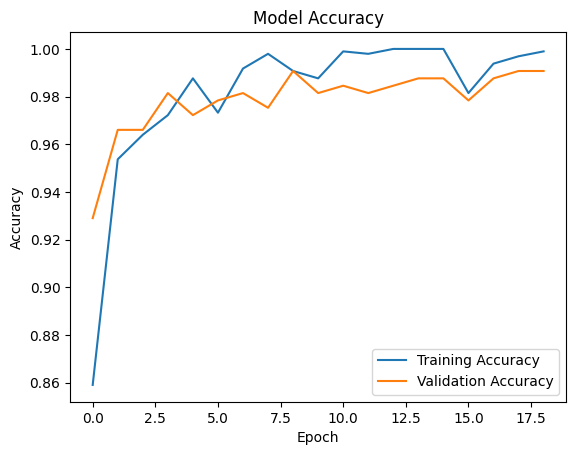

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model Performance Metrics:
- Accuracy: 0.9784
- MCC: 0.9556
- F1 Score: 0.9738
- Recall: 0.9848
- Precision: 0.9630

Confusion Matrix Values:
- True Negatives (TN): 187
- False Positives (FP): 5
- False Negatives (FN): 2
- True Positives (TP): 130


In [44]:
import matplotlib.pyplot as plt

plt.plot(rnn_clf_fc.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_clf_fc.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred_fc = model_fc.predict(X_test_fc_rnn, batch_size=BATCH_SIZE_FC)

y_pred_fc_classes = (y_pred_fc > 0.5).astype(int) # to convert probabilities in classes (0 or 1)

accuracy = accuracy_score(y_test_fc_rnn, y_pred_fc_classes)
mcc = matthews_corrcoef(y_test_fc_rnn, y_pred_fc_classes)
f1 = f1_score(y_test_fc_rnn, y_pred_fc_classes)
tn, fp, fn, tp = confusion_matrix(y_test_fc_rnn, y_pred_fc_classes).ravel()
recall = recall_score(y_test_fc_rnn, y_pred_fc_classes)
precision = precision_score(y_test_fc_rnn, y_pred_fc_classes)

rnn_fc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)

print(rnn_fc_results_summary)

### **Second Config**

In [45]:
# CONSTANT VARIABLES
BATCH_SIZE_SC = 16
EPOCHS_SC = 100
TIME_STEPS_SC = 15
FEATURES_SHAPE_SC = X_train_second_config_rnn_std.shape[1]
NUM_OVERLAP_SAMPLES_SC = 8

In [46]:
model_sc = Sequential([
    Input(shape=(TIME_STEPS_SC, FEATURES_SHAPE_SC)),
    GRU(units=64, return_sequences=False, activation='tanh', kernel_regularizer=l1(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

Display the architecture of the Network:

In [47]:
model_sc.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 64)                  │          23,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,049 (101.75 KB)

 Trainable params: 26,049 (101.75 KB)

 Non-trainable params: 0 (0.00 B)

Reshape training, validation and test set and create more sequences using the function create_sequences defined in an above module

In [48]:
X_train_sc_rnn, y_train_sc_rnn = create_sequences(X_train_second_config_rnn_std, y_train_second_config_rnn, TIME_STEPS_SC, NUM_OVERLAP_SAMPLES_SC)

X_val_sc_rnn, y_val_sc_rnn = create_sequences(X_val_second_config_rnn_std, y_val_second_config_rnn, TIME_STEPS_SC, NUM_OVERLAP_SAMPLES_SC)

X_test_sc_rnn, y_test_sc_rnn = create_sequences(X_test_second_config_rnn_std, y_test_second_config_rnn, TIME_STEPS_SC, NUM_OVERLAP_SAMPLES_SC)

#### **Compile and train the model**

In [49]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (epoch / 20)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

initial_lr = 0.005

model_sc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lambda epoch: exponential_decay_fn(epoch, initial_lr))

rnn_clf_sc = model_sc.fit(
    X_train_sc_rnn,
    y_train_sc_rnn,
    batch_size=BATCH_SIZE_SC,
    epochs=EPOCHS_SC,
    validation_data=(X_val_sc_rnn, y_val_sc_rnn),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7686 - loss: 1.0887 - val_accuracy: 0.9136 - val_loss: 0.5472 - learning_rate: 0.0050
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9420 - loss: 0.4593 - val_accuracy: 0.9722 - val_loss: 0.3179 - learning_rate: 0.0045
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9699 - loss: 0.3196 - val_accuracy: 0.9537 - val_loss: 0.2888 - learning_rate: 0.0040
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9543 - loss: 0.3017 - val_accuracy: 0.9722 - val_loss: 0.2678 - learning_rate: 0.0035
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9852 - loss: 0.2455 - val_accuracy: 0.9877 - val_loss: 0.1953 - learning_rate: 0.0032
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9814 - loss: 0.1968 - val_accuracy: 0.9877 - val_loss: 0.1796 - learning_rate: 0.0028
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9930 - loss: 0.1551 - val

Shows the model accuracy graph. Subsequently we test the network and print the obtained metrics.

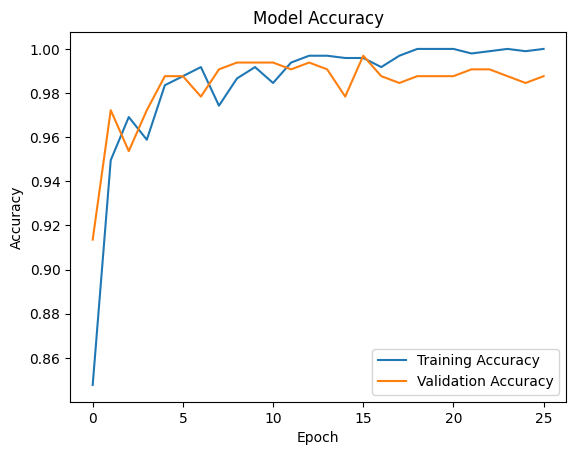

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Model Performance Metrics:
- Accuracy: 0.9846
- MCC: 0.9687
- F1 Score: 0.9814
- Recall: 1.0000
- Precision: 0.9635

Confusion Matrix Values:
- True Negatives (TN): 187
- False Positives (FP): 5
- False Negatives (FN): 0
- True Positives (TP): 132


In [50]:
import matplotlib.pyplot as plt

plt.plot(rnn_clf_sc.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_clf_sc.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred_sc = model_sc.predict(X_test_sc_rnn, batch_size=BATCH_SIZE_SC)

y_pred_sc_classes = (y_pred_sc > 0.5).astype(int) # to convert probabilities in classes (0 or 1)

accuracy = accuracy_score(y_test_sc_rnn, y_pred_sc_classes)
mcc = matthews_corrcoef(y_test_sc_rnn, y_pred_sc_classes)
f1 = f1_score(y_test_sc_rnn, y_pred_sc_classes)
tn, fp, fn, tp = confusion_matrix(y_test_sc_rnn, y_pred_sc_classes).ravel()
recall = recall_score(y_test_sc_rnn, y_pred_sc_classes)
precision = precision_score(y_test_sc_rnn, y_pred_sc_classes)

rnn_sc_results_summary = (
    f"Model Performance Metrics:\n"
    f"- Accuracy: {accuracy:.4f}\n"
    f"- MCC: {mcc:.4f}\n"
    f"- F1 Score: {f1:.4f}\n"
    f"- Recall: {recall:.4f}\n"
    f"- Precision: {precision:.4f}\n"
    f"\nConfusion Matrix Values:\n"
    f"- True Negatives (TN): {tn}\n"
    f"- False Positives (FP): {fp}\n"
    f"- False Negatives (FN): {fn}\n"
    f"- True Positives (TP): {tp}"
)

print(rnn_sc_results_summary)

# **Save Model and Scaler**

In [51]:
import joblib

## **Save the best model**

All models have better performances on the second configuration.  
The best accuracy and MCC are reached by the Stacking algorithm on the second configuration and I will choose it to implement the anomaly detector but there are some consideration to do before choosing the model to use.  
Although this model has reached the higher accuracy and MCC, this is one of the model with the highest number of false negatives. In general, especially in safety-critical systems (SCS), criticality arises when the algorithm fails to identify an anomaly by producing a false negative that could then lead to a catastrophic failure. In a SCS it is better to notify a possible anomaly resulting in a false positive rather than not to identify an ongoing anomaly.  
Since my laptop is not a safety-critical system, I prefer to choose the model with the highest accuracy and MCC but the previous considerations are important to highlight.

In [52]:
joblib.dump(stack_sc_clf, root_path+'best_model_stacking.pkl')

['gdrive/My Drive/Magistrale/Projects/DCML/best_model_stacking.pkl']

## **Save the scaler to scale input data during run-time monitoring**

Saves the standard scaler fitted on the second configuration which will be used after deploying the best performing model to scale the runtime data before entering the model (this last is indeed trained on scaled data). I save the standard scaler fitted on the second configuration, not related to RNN, because the best model that i have saved it has been trained on the second configuration.

In [53]:
joblib.dump(std_scaler_second_config, root_path+'scaler.pkl')

['gdrive/My Drive/Magistrale/Projects/DCML/scaler.pkl']